In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from ipywidgets import IntSlider, interact
from glob import glob
from scipy.stats import pearsonr

import os
for dirname, _, filenames in os.walk('/mlproject1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mlproject1\mlproject.ipynb
/mlproject1\.ipynb_checkpoints\mlproject-checkpoint.ipynb
/mlproject1\housing_data\Bangalore.csv
/mlproject1\housing_data\Chennai.csv
/mlproject1\housing_data\Delhi.csv
/mlproject1\housing_data\Hyderabad.csv
/mlproject1\housing_data\Kolkata.csv
/mlproject1\housing_data\Mumbai.csv


In [2]:
def wrangle(filename):
    # Read a CSV file
    df = pd.read_csv(filename)
    
    # Removing 9 from the dataset to remain with 0 and 1 as yes or no
    df.replace(9, np.nan, inplace=True)
    df.dropna(inplace=True)
    
    # Removing columns 'Wifi' and 'Wardrobe' because they only contain 0 value only
    df.drop(columns = ['Wifi', 'Wardrobe'], inplace=True)
    
    # Removing 'Price' higher than 100000000
    maskprice = df["Price"]< 100000000
    df = df[maskprice]
    
    return df

In [3]:
files = glob("/mlproject1/housing_data/*")
files

['/mlproject1/housing_data\\Bangalore.csv',
 '/mlproject1/housing_data\\Chennai.csv',
 '/mlproject1/housing_data\\Delhi.csv',
 '/mlproject1/housing_data\\Hyderabad.csv',
 '/mlproject1/housing_data\\Kolkata.csv',
 '/mlproject1/housing_data\\Mumbai.csv']

In [4]:
frames = [wrangle(file) for file in files]

# checking the first dataset in frame index 0
frames[0].head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8358000,1675,Doddanekundi,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6845000,1670,Kengeri,3,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# combining the datasets into a single dataframe
df = pd.concat(frames , ignore_index=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10063 entries, 0 to 10062
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                10063 non-null  int64  
 1   Area                 10063 non-null  int64  
 2   Location             10063 non-null  object 
 3   No. of Bedrooms      10063 non-null  float64
 4   Resale               10063 non-null  int64  
 5   MaintenanceStaff     10063 non-null  float64
 6   Gymnasium            10063 non-null  float64
 7   SwimmingPool         10063 non-null  float64
 8   LandscapedGardens    10063 non-null  float64
 9   JoggingTrack         10063 non-null  float64
 10  RainWaterHarvesting  10063 non-null  float64
 11  IndoorGames          10063 non-null  float64
 12  ShoppingMall         10063 non-null  float64
 13  Intercom             10063 non-null  float64
 14  SportsFacility       10063 non-null  float64
 15  ATM                  10063 non-null 

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7888000,1045,Dasarahalli on Tumkur Road,2.0,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4866000,1179,Kannur on Thanisandra Main Road,2.0,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8358000,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6845000,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(10063, 38)

In [7]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
count,1.006300e+04,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,...,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000
mean,9.869902e+06,1338.745106,2.454536,0.342244,0.170327,0.520421,0.414091,0.348703,0.333201,0.367187,...,0.513167,0.716586,0.090530,0.298122,0.048395,0.021564,0.055550,0.052569,0.050681,0.050979
std,9.119691e+06,669.491606,0.753904,0.474484,0.375938,0.499608,0.492589,0.476584,0.471381,0.482062,...,0.499851,0.450678,0.286953,0.457456,0.214610,0.145263,0.229062,0.223182,0.219356,0.219965
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000e+06,932.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.948999e+06,1200.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.170000e+07,1600.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.250000e+07,9400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Using a Statistical representation

df.corr()

C:\Users\skyme\AppData\Local\Temp\ipykernel_41316\4067994583.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
Price,1.000000,0.726960,0.526931,0.187513,0.126891,0.191681,0.199494,0.167906,0.152136,0.183175,...,0.211009,0.108987,0.131728,0.103966,0.131132,0.091358,0.142350,0.121266,0.130850,0.133444
Area,0.726960,1.000000,0.735508,0.001506,-0.010538,0.282444,0.319905,0.246129,0.263301,0.202243,...,0.325347,0.136731,0.041562,0.165580,0.137705,0.065710,0.098936,0.113525,0.120266,0.112685
No. of Bedrooms,0.526931,0.735508,1.000000,0.003772,-0.097860,0.131030,0.177416,0.120885,0.132261,0.067132,...,0.188507,0.107741,-0.018414,0.083394,0.093146,0.017574,0.071888,0.080655,0.074031,0.077204
Resale,0.187513,0.001506,0.003772,1.000000,0.263754,-0.153162,-0.226270,-0.137973,-0.173092,-0.015899,...,-0.154351,0.011191,0.184100,0.008822,-0.022128,-0.050852,0.013429,-0.015999,0.019532,-0.013875
MaintenanceStaff,0.126891,-0.010538,-0.097860,0.263754,1.000000,0.138633,0.069364,0.192106,0.165944,0.323359,...,0.030375,0.127156,0.229242,0.220189,-0.013488,0.143842,0.021682,-0.022628,-0.011891,-0.016078
Gymnasium,0.191681,0.282444,0.131030,-0.153162,0.138633,1.000000,0.758966,0.580113,0.632592,0.481995,...,0.720137,0.371755,0.127482,0.366897,0.109889,0.139773,0.071284,0.120948,0.138372,0.106734
SwimmingPool,0.199494,0.319905,0.177416,-0.226270,0.069364,0.758966,1.000000,0.631184,0.690624,0.528577,...,0.669081,0.317845,0.009677,0.425928,0.145095,0.168257,0.092064,0.153632,0.158950,0.139942
LandscapedGardens,0.167906,0.246129,0.120885,-0.137973,0.192106,0.580113,0.631184,1.000000,0.682960,0.586823,...,0.552069,0.276933,0.012595,0.444865,0.078883,0.181357,0.041035,0.087397,0.104727,0.083536
JoggingTrack,0.152136,0.263301,0.132261,-0.173092,0.165944,0.632592,0.690624,0.682960,1.000000,0.613541,...,0.580539,0.251353,-0.035669,0.538499,0.071452,0.194047,0.036579,0.066823,0.070229,0.070994
RainWaterHarvesting,0.183175,0.202243,0.067132,-0.015899,0.323359,0.481995,0.528577,0.586823,0.613541,1.000000,...,0.454045,0.287379,-0.019044,0.557233,0.033795,0.149476,0.050170,0.036727,0.045804,0.042770


<Axes: >

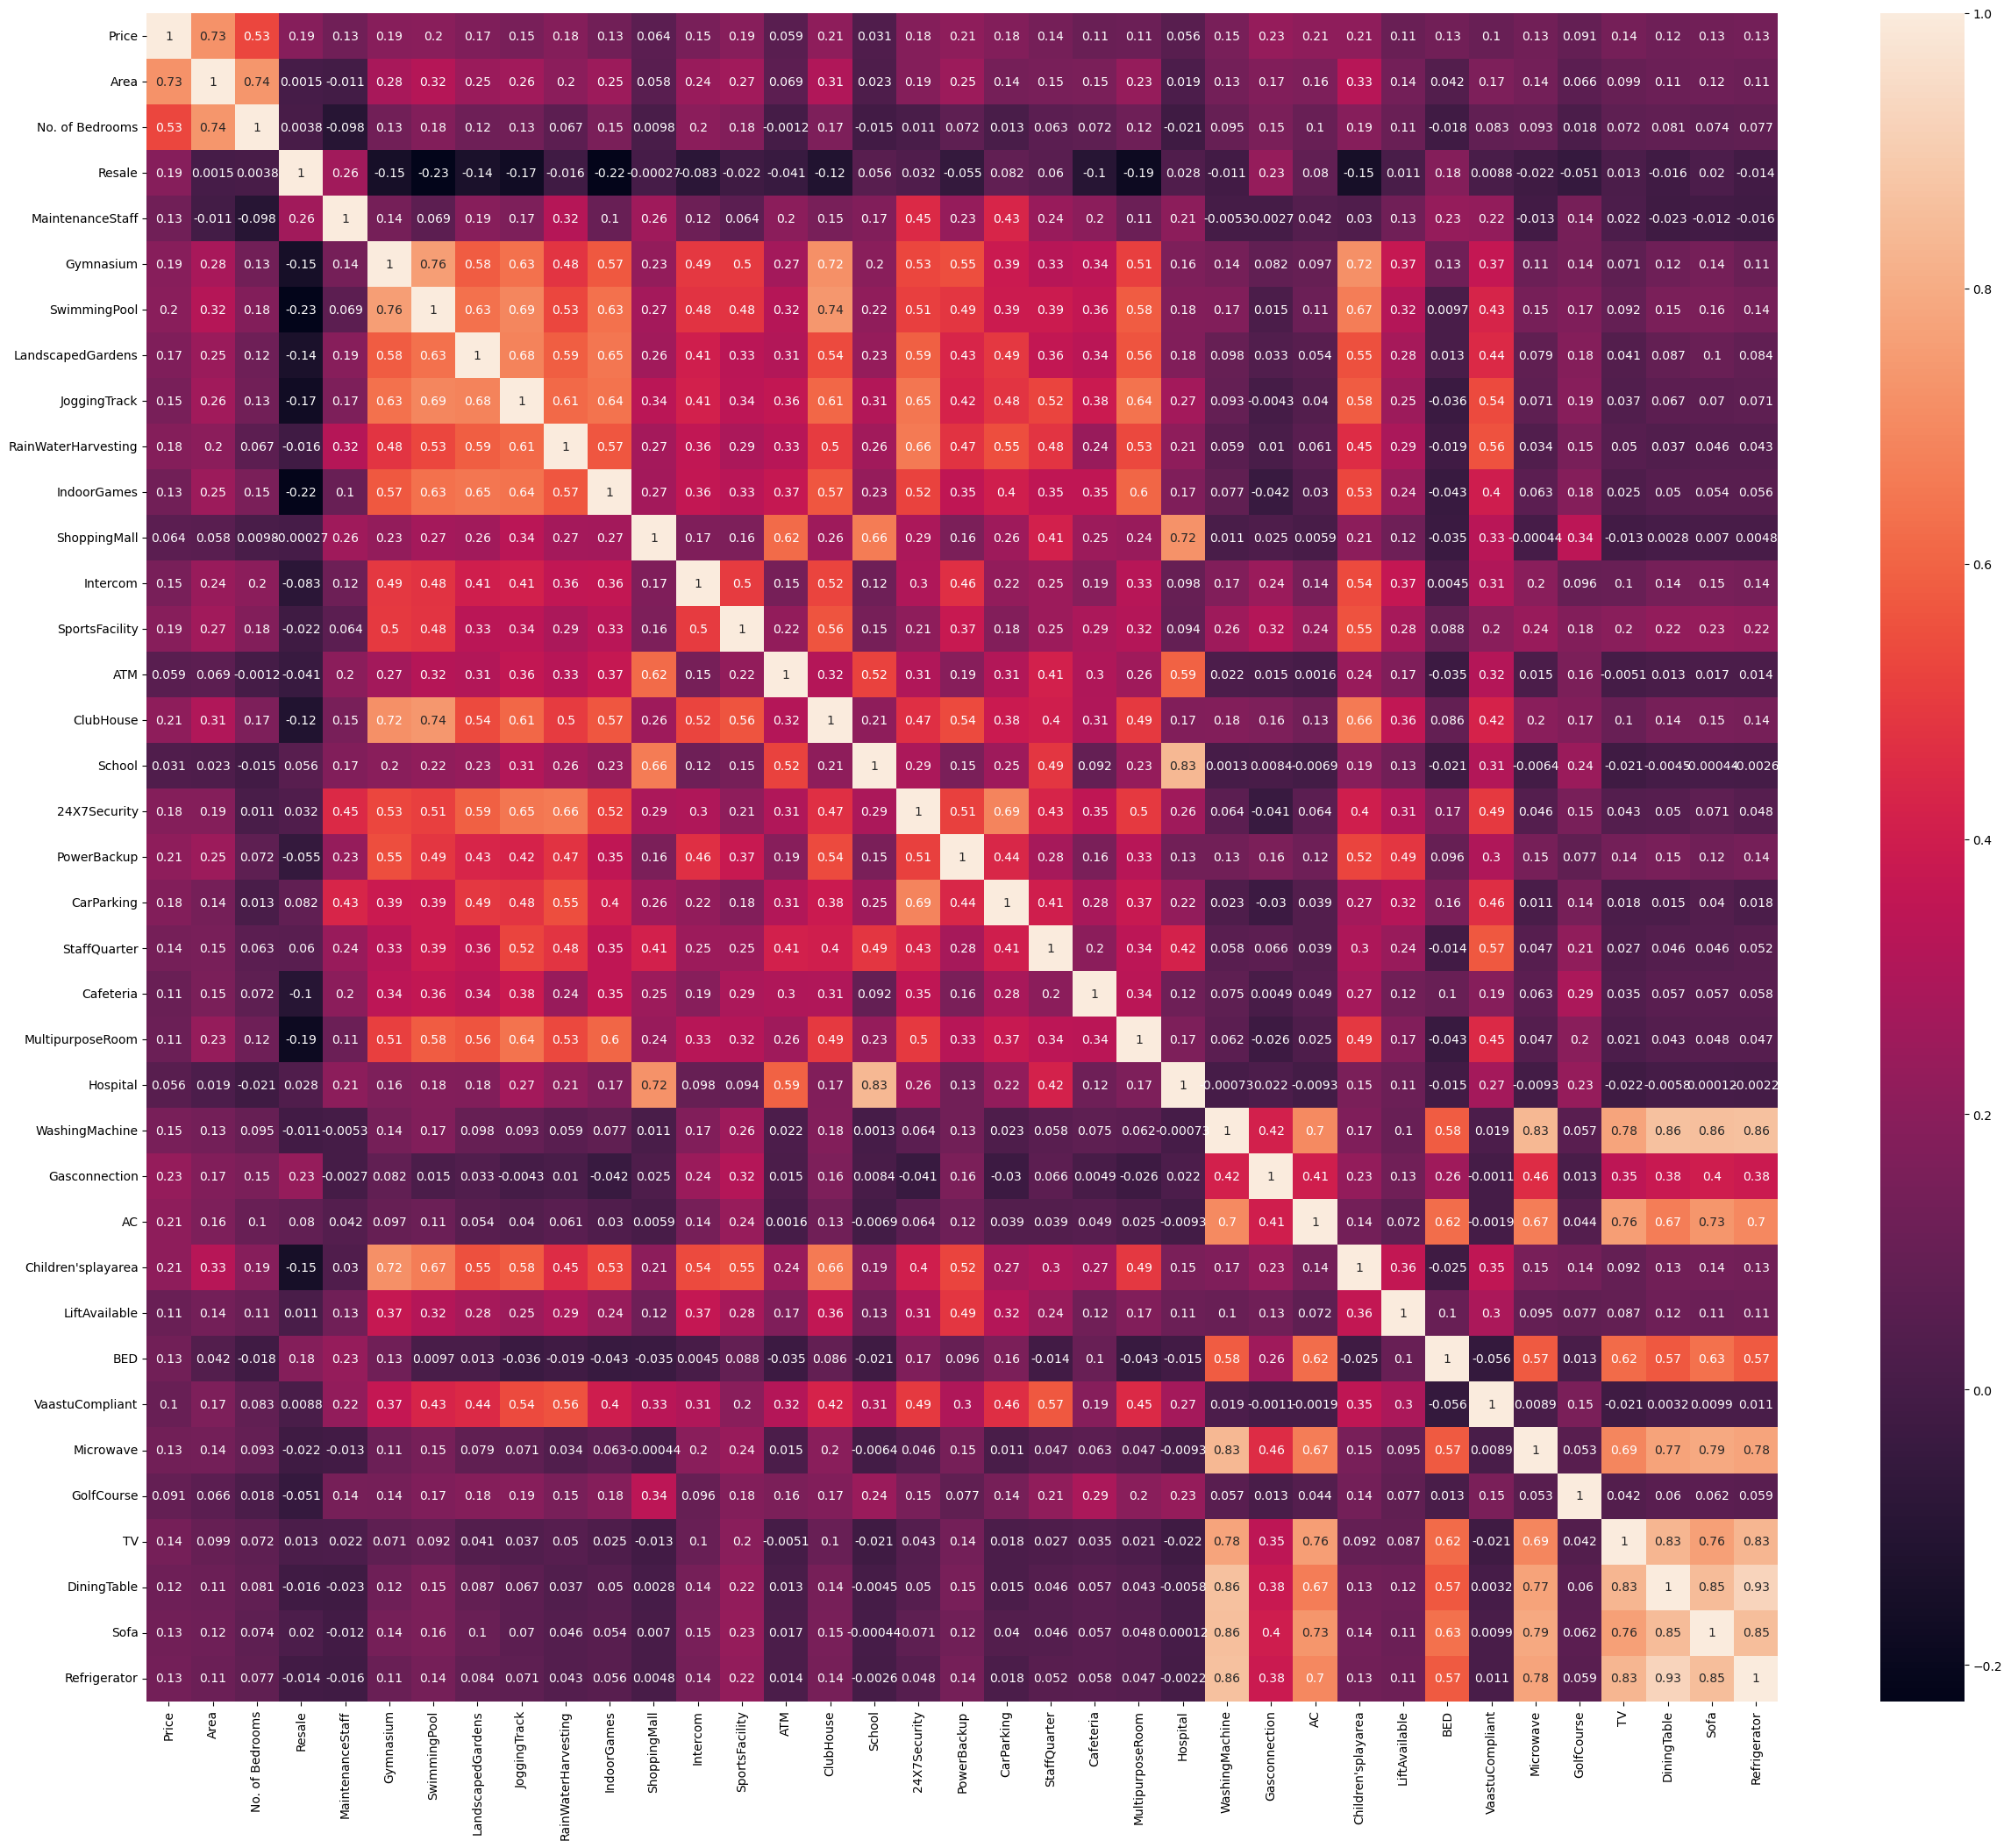

In [9]:
# Using a heatmap
# Removing categorical data from the dataframe first

heatmap_df = df.select_dtypes(exclude='object')

plt.figure(figsize= (30,25))
sns.heatmap(heatmap_df.corr(), annot=True)

In [10]:
# Comparing 'Price' with 'Area' using Pearson correlation because they have a correlation of 0.73

pearsonr(df['Price'], df['Area'])


PearsonRResult(statistic=0.7269604934814182, pvalue=0.0)

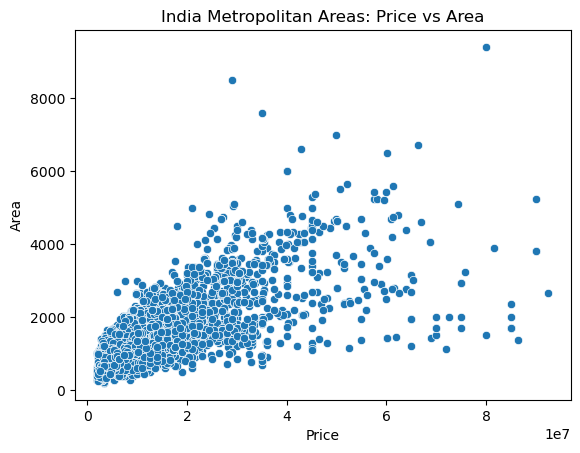

In [11]:
# Using a scatterplot to see the positive relationship
sns.scatterplot(x=df['Price'], y=df['Area'])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('India Metropolitan Areas: Price vs Area');

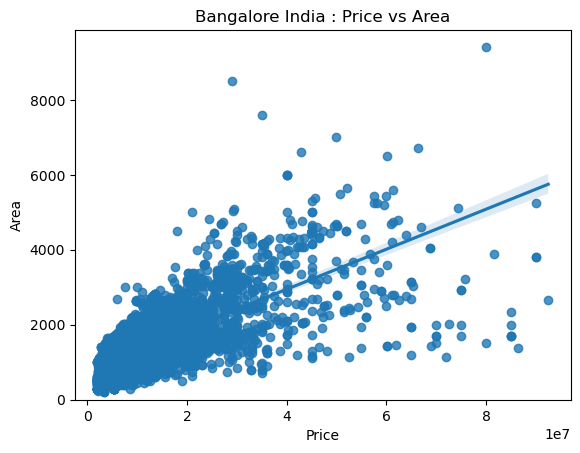

In [12]:
# Using a regression plot to just try to plot the line
sns.regplot(x = df['Price'], y=df['Area'])
plt.ylim(0,)
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Bangalore India : Price vs Area');

In [13]:
target = "Price"
feature = ["Area"]
X_train = df[feature]
y_train = df[target]

In [14]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)


len(y_pred_baseline) == len(y_train)

True

In [15]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 9869901.59
Baseline MAE: 5936449.77


In [16]:
y_mean - mae_baseline

3933451.8151296536

## Modeling Dataset
Next step
1. Creating the model
2. Fitting the model
3. Predicting the model

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([29687371.31111167,  6961084.34505445,  8288022.23326869,
       13199672.92397212, 13150160.31620293])

In [20]:
mae_training = mean_absolute_error(y_train, y_pred_training)

print("Training MAE:", round(mae_training, 2))

Training MAE: 3625813.18


In [21]:
# Seeing how much the Baseline Model has been beat
mae_baseline - mae_training

2310636.587893166

In [22]:
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)

Model Intercept: -3387050.68


In [23]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "Area":', coefficient)

Model coefficient for "Area": 9902.52


In [24]:
# The formula

print(f"apt_price = {intercept} + {coefficient} * Area")

apt_price = -3387050.68 + 9902.52 * Area


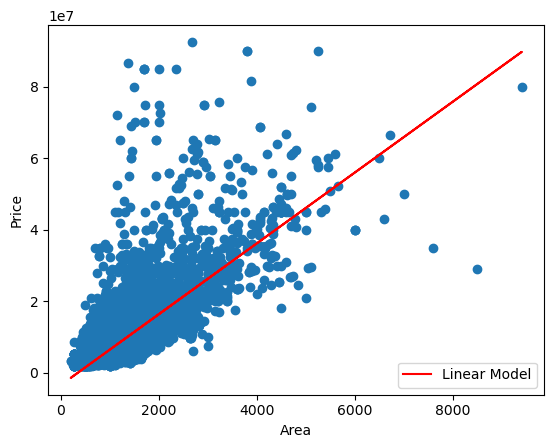

In [25]:
plt.plot(X_train.values, model.predict(X_train), color="r", label= "Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend();

In [26]:
# the function

def make_prediction(area):
    data = {
        "Area" : area,
        
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [27]:
# Testing the model using 3402 as 'Area'
make_prediction(3402)

'Predicted apartment price: $30301327.65'

In [28]:
# Testing using a Slider
interact(
    make_prediction,
    area=IntSlider(
        min=X_train["Area"].min(),
        max=X_train["Area"].max(),
        value=X_train["Area"].mean(),
    )
);

interactive(children=(IntSlider(value=1338, description='area', max=9400, min=200), Output()), _dom_classes=('…